In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
insure=pd.read_csv('../Datasets/insurance.csv')
insure

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(insure[['age']])
insure['age']=scale.transform(insure[['age']])
insure

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,27.900,0,yes,southwest,16884.92400
1,0.000000,male,33.770,1,no,southeast,1725.55230
2,0.217391,male,33.000,3,no,southeast,4449.46200
3,0.326087,male,22.705,0,no,northwest,21984.47061
4,0.304348,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,30.970,3,no,northwest,10600.54830
1334,0.000000,female,31.920,0,no,northeast,2205.98080
1335,0.000000,female,36.850,0,no,southeast,1629.83350
1336,0.065217,female,25.800,0,no,southwest,2007.94500


In [5]:
scale.fit(insure[['charges']])
insure['charges']=scale.transform(insure[['charges']])

In [11]:
insure

,age,sex,bmi,children,smoker,region,charges,Charges)
0,0.021739,female,27.900,0,yes,southwest,0.251611,0.251611
1,0.000000,male,33.770,1,no,southeast,0.009636,0.009636
2,0.217391,male,33.000,3,no,southeast,0.053115,0.053115
3,0.326087,male,22.705,0,no,northwest,0.333010,0.333010
4,0.304348,male,28.880,0,no,northwest,0.043816,0.043816
...,...,...,...,...,...,...,...,...
1333,0.695652,male,30.970,3,no,northwest,0.151299,0.151299
1334,0.000000,female,31.920,0,no,northeast,0.017305,0.017305
1335,0.000000,female,36.850,0,no,southeast,0.008108,0.008108
1336,0.065217,female,25.800,0,no,southwest,0.014144,0.014144


In [12]:
X=insure.iloc[:,[0,6]].values
X

array([[0.02173913, 0.25161076],
       [0.        , 0.00963595],
       [0.2173913 , 0.05311516],
       ...,
       [0.        , 0.00810808],
       [0.06521739, 0.01414352],
       [0.93478261, 0.44724873]])

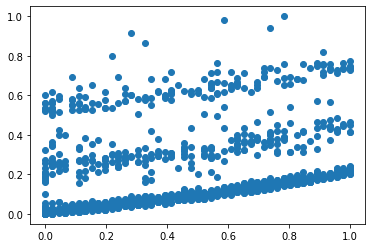

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.show()

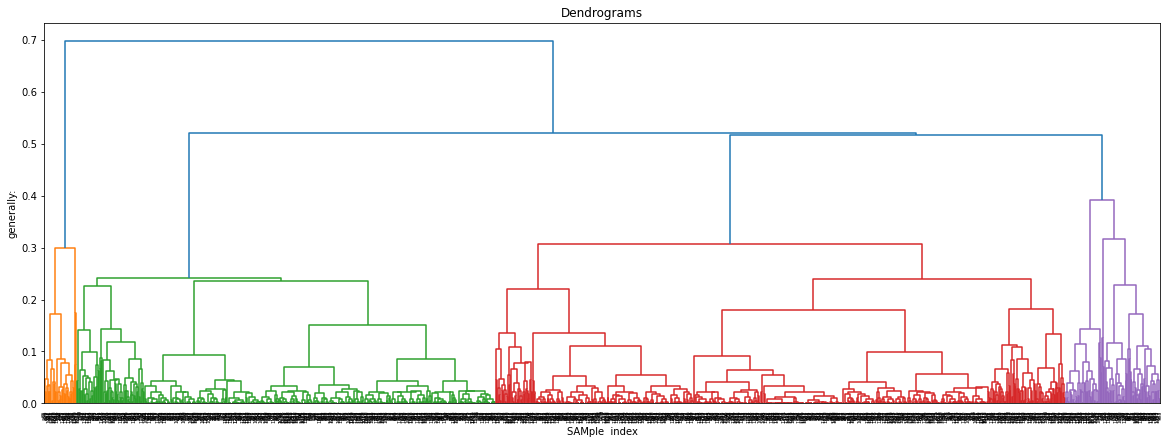

In [14]:
import scipy.cluster.hierarchy as hc
plt.figure(figsize=(20,7))
plt.title('DendoGrams:')
hc.dendrogram(hc.linkage(X,method='centroid'))
plt.title("Dendrograms")
plt.xlabel("SAMple  index")
plt.ylabel('generally:')
plt.show()

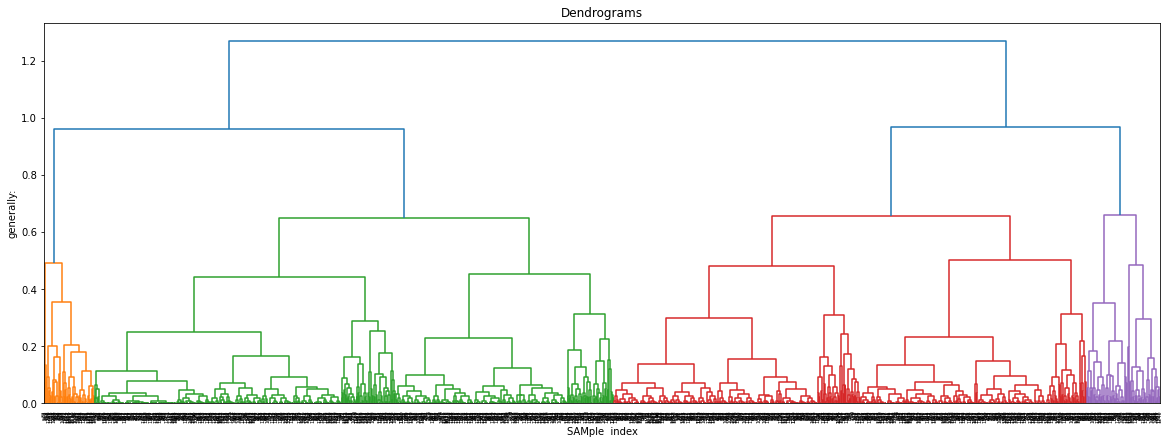

In [19]:
import scipy.cluster.hierarchy as hc
plt.figure(figsize=(20,7))
plt.title('DendoGrams:')
hc.dendrogram(hc.linkage(X,method='complete'))
plt.title("Dendrograms")
plt.xlabel("SAMple  index")
plt.ylabel('generally:')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
cluster.fit(X)
lab=cluster.labels_
lab
# 2 default value for n_clusters:
# def: of linkage is mod,maxi

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

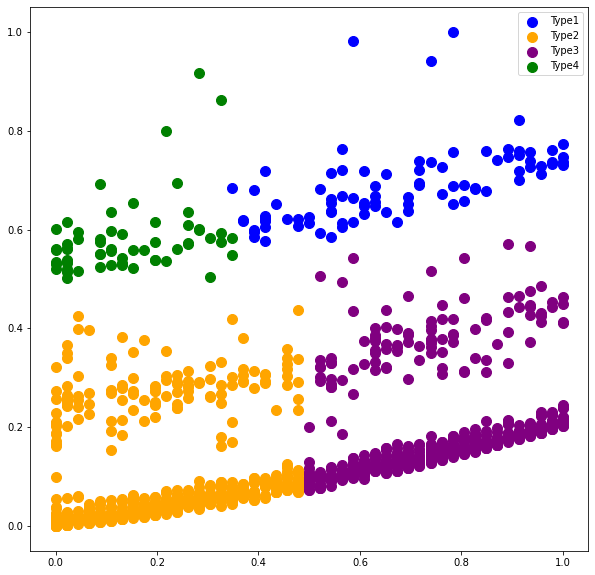

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(X[lab== 0,0],X[lab==0,1],s=100,c='blue',label='Type1')
plt.scatter(X[lab== 1,0],X[lab==1,1],s=100,c='orange',label='Type2')
plt.scatter(X[lab== 2,0],X[lab==2,1],s=100,c='purple',label='Type3')
plt.scatter(X[lab== 3,0],X[lab==3,1],s=100,c='green',label='Type4')
plt.legend() 
# plt.legend() for the labels mentioned in the tables
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
cluster.fit(X)
lab=cluster.labels_
lab
# 2 default value for n_clusters:
# def: of linkage is mod,maxi

array([3, 3, 3, ..., 3, 3, 1], dtype=int64)

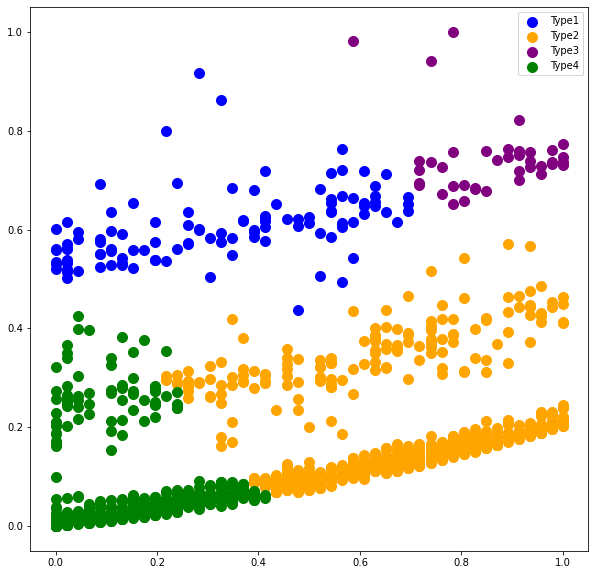

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(X[lab== 0,0],X[lab==0,1],s=100,c='blue',label='Type1')
plt.scatter(X[lab== 1,0],X[lab==1,1],s=100,c='orange',label='Type2')
plt.scatter(X[lab== 2,0],X[lab==2,1],s=100,c='purple',label='Type3')
plt.scatter(X[lab== 3,0],X[lab==3,1],s=100,c='green',label='Type4')
plt.legend() 
# plt.legend() for the labels mentioned in the tables
plt.show()